In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

import statistics

import joblib

from sklearn.inspection import plot_partial_dependence

# Function

In [ ]:
def plot_scatter(split, fn, fp):
    val_path = "../kitt/DATA_progress3_new/{}/val/val.csv".format(split)
    val_data = pd.read_csv(val_path)
    train_path = "../kitt/DATA_progress3_new/{}/train/train_oversampling.csv".format(split)
    train_data = pd.read_csv(train_path)
    
    # false negative : truth=M predicted=B
    
#     col = ['texture_mean', 'area_mean', 'smoothness_mean',
#        'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
#        'texture_se', 'area_se', 'smoothness_se', 'concavity_se', 'symmetry_se',
#        'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
#        'symmetry_worst', 'fractal_dimension_worst']
    
    x_col = 'concavity_mean'
    y_col = 'fractal_dimension_se'
    
    # Get the false predictions data from the original data using the indices of false predictions
    fn = val_data.iloc[fn]
    fp = val_data.iloc[fp]
     
    # Get the true predictions data from the original data using the indices of true predictions
    benign_data = train_data[229:]
    malignant_data= train_data[:228]

    # Create the scatter plot with false predictions data as red dots and true predictions data as blue dots
    plt.scatter(benign_data[x_col], benign_data[y_col], color='green', label='B', alpha=0.5)
    plt.scatter(malignant_data[x_col], malignant_data[y_col], color='red', label='M', alpha=0.5)
    plt.scatter(fn[x_col], fn[y_col], color='black', label='False Negative')
    plt.scatter(fp[x_col], fp[y_col], color='blue', label='False Positive')

    # Add legend and labels
    plt.legend()
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Show the plot
    plt.show()

# split 1

../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 0.9412
Confusion Matrix
----------------
[[55  2]
 [ 2 32]] 

----------------
split1
Sensitivity: 94.12%
Specificity: 96.49%
Accuracy: 95.60%
Precision: 94.12%
Sensitivity: 94.12%
Precision: 94.12%
F1: 94.12%


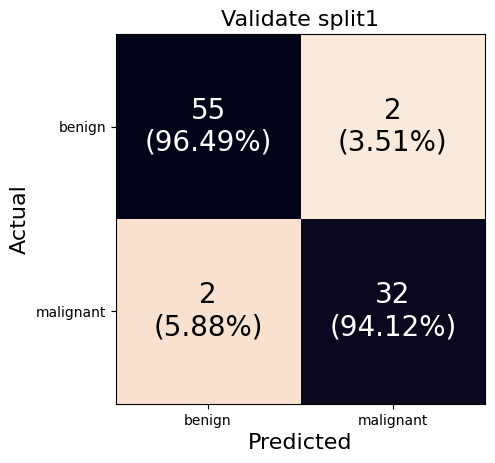

################# test set ##################
Best Threshold=1.000000
FPR: 0.1250
TPR: 0.9048
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
2    8510426         B         14.36      566.3          0.09779   
8     923465         B         24.21      361.6          0.08192   
10    904647         B         10.91      442.7          0.08872   
18   8712291         B         19.76      690.2          0.08421   
46     86408         B         20.76      480.4          0.09933   
50    861103         B         20.97      401.5          0.11020   
56   8711216         B         19.46      880.2          0.07445   
61    922297         B         20.70      584.8          0.09578   
66    883852         B         18.19      389.4          0.09592   
79    867739         M         21.91     1075.0          0.09430   
82   9110127         M         16.85      990.0          0.08947   
98    842517         M         17.77     1326.0          0.08474   
100   873592         M

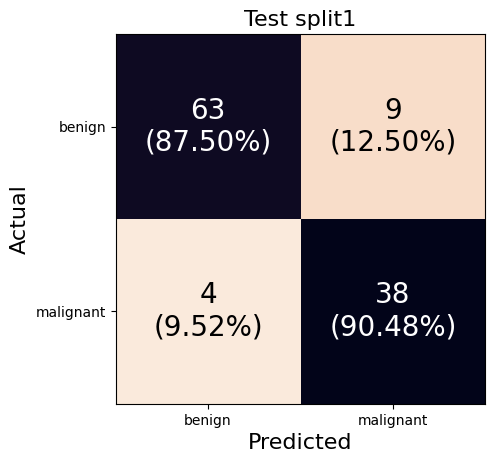

---------------------------------------
AUC validate: 95.30%
AUC test: 88.99%


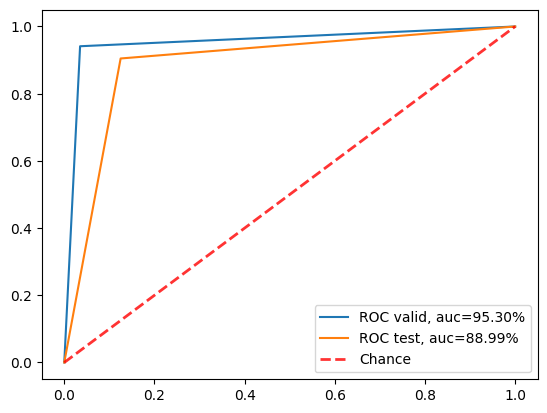

false_predict
The most important feature in split split1 is: concavity_worst


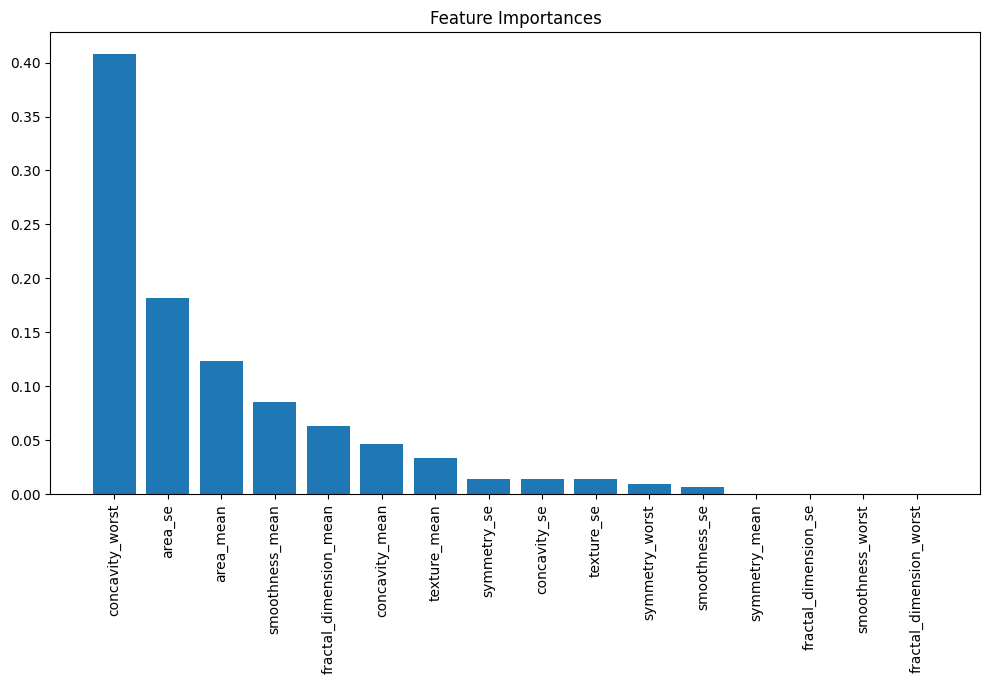

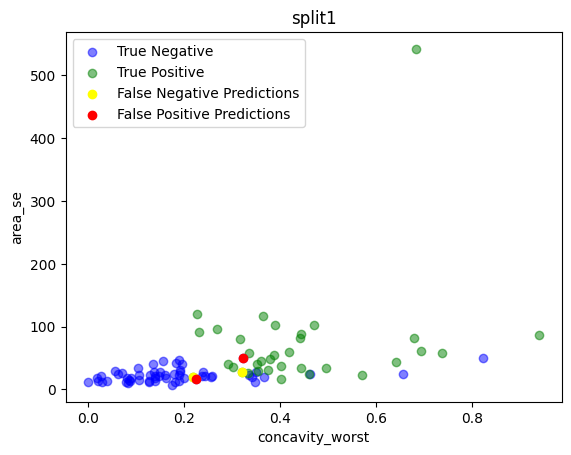

In [13]:
split = 'split1'
val_data = pd.read_csv("../kitt/DATA_progress3_new/split1/val/val.csv")

In [4]:
# false_predict("split1")

# split 2

../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
############## validate set ################
Best Threshold=1.000000
FPR: 0.0351
TPR: 1.0000
Confusion Matrix
----------------
[[55  2]
 [ 0 34]] 

----------------
split2
Sensitivity: 100.00%
Specificity: 96.49%
Accuracy: 97.80%
Precision: 94.44%
Sensitivity: 100.00%
Precision: 94.44%
F1: 97.14%


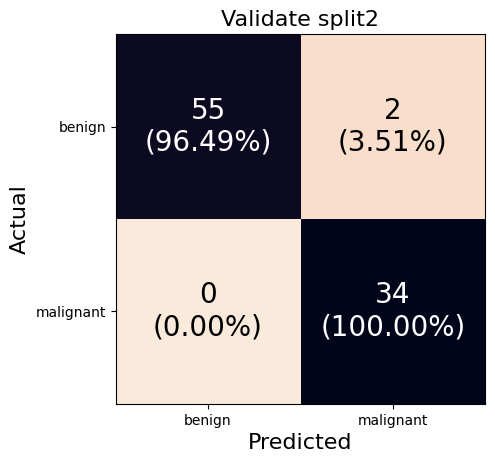

################# test set ##################
Best Threshold=1.000000
FPR: 0.0556
TPR: 0.8333
            id diagnosis  texture_mean  area_mean  smoothness_mean  \
0       904969         B         14.95      469.1          0.08682   
33      904689         B         18.29      525.2          0.07351   
51    91376701         B         22.44      466.5          0.08192   
66      883852         B         18.19      389.4          0.09592   
76   911296201         M         27.15      930.9          0.09898   
79      867739         M         21.91     1075.0          0.09430   
82     9110127         M         16.85      990.0          0.08947   
84      916838         M         20.26     1214.0          0.10370   
89      873593         M         26.57     1311.0          0.11410   
97      869691         M         16.58      432.0          0.10910   
110     908445         M         21.97     1110.0          0.10180   

     concavity_mean  symmetry_mean  fractal_dimension_mean  textu

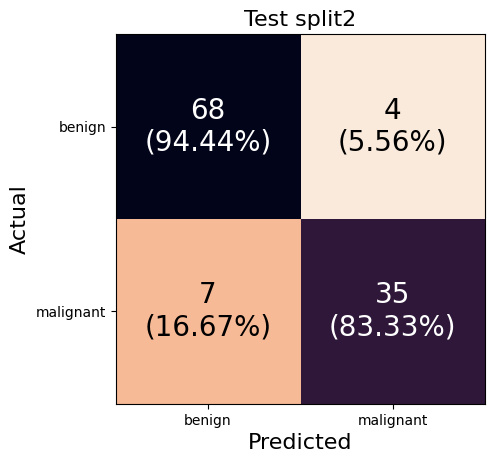

---------------------------------------
AUC validate: 98.25%
AUC test: 88.89%


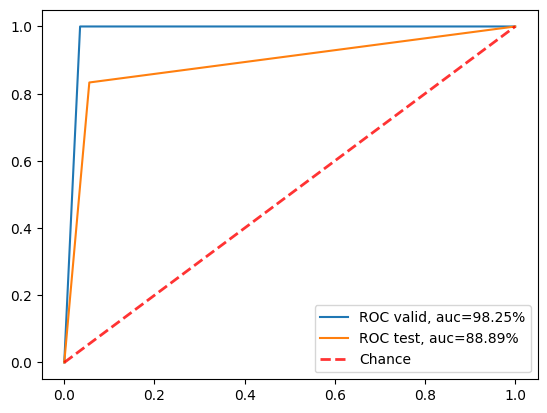

false_predict
The most important feature in split split2 is: area_se


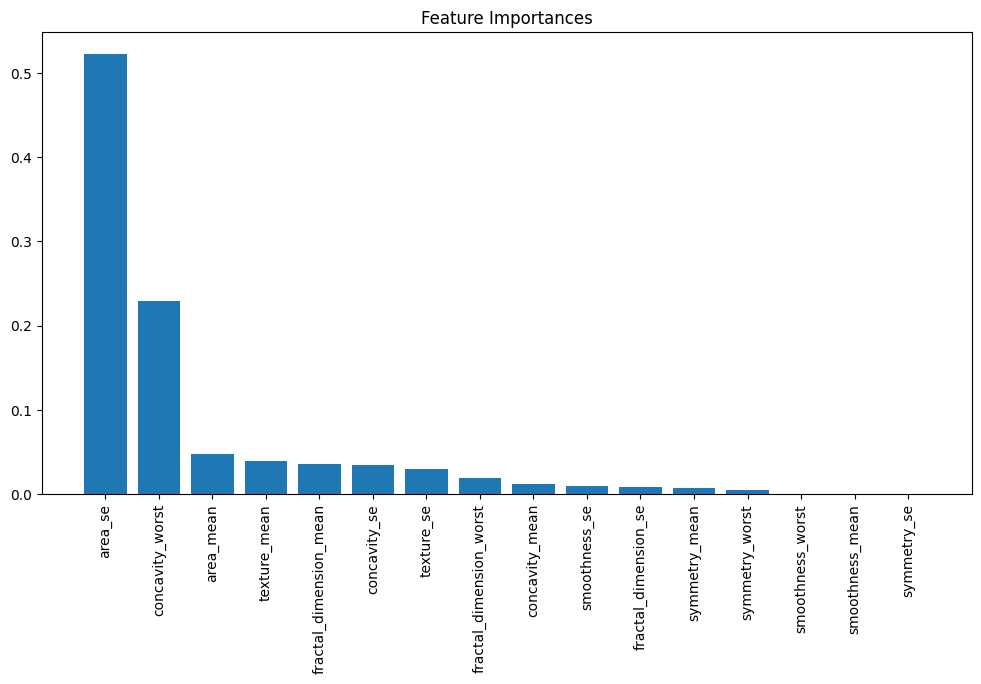

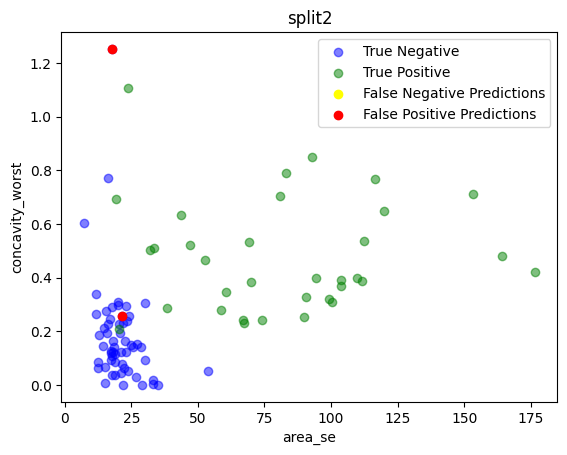

In [14]:
split_num = 2
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
param = 1
param1_split2_cm_val, param1_split2_cm_test, param1_split2_AUC_val, param1_split2_AUC_test = evaluate(param,split)

# split 3

../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
############## validate set ################
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
Confusion Matrix
----------------
[[54  3]
 [ 1 33]] 

----------------
split3
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%


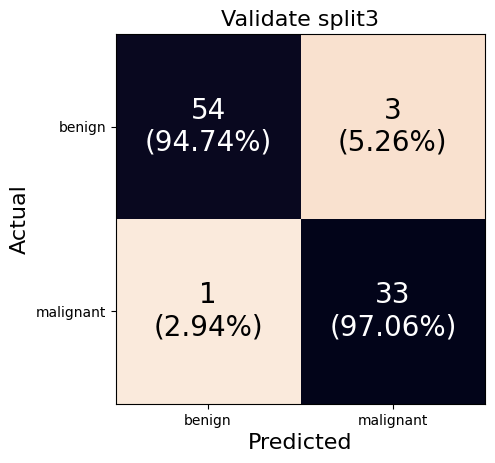

################# test set ##################
Best Threshold=1.000000
FPR: 0.0833
TPR: 0.8571
            id diagnosis  texture_mean  area_mean  smoothness_mean  \
16      877501         B         19.56      461.0          0.09586   
20      874373         B         17.19      420.3          0.09774   
21      904357         B         17.26      431.9          0.09087   
29       87127         B          9.71      357.6          0.09594   
33      904689         B         18.29      525.2          0.07351   
41      891923         B         13.27      582.7          0.09198   
74      864877         M         22.91      782.6          0.11550   
76   911296201         M         27.15      930.9          0.09898   
79      867739         M         21.91     1075.0          0.09430   
89      873593         M         26.57     1311.0          0.11410   
94       85715         M         18.66      534.6          0.11580   
100     873592         M         21.87     2250.0          0.10940

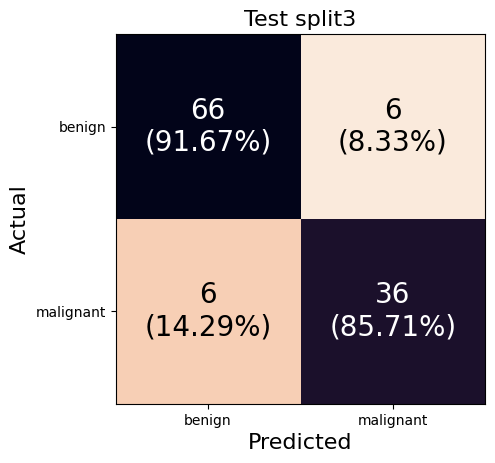

---------------------------------------
AUC validate: 95.90%
AUC test: 88.49%


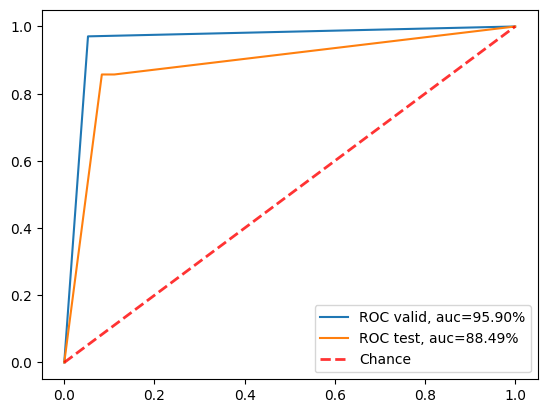

false_predict
The most important feature in split split3 is: concavity_worst


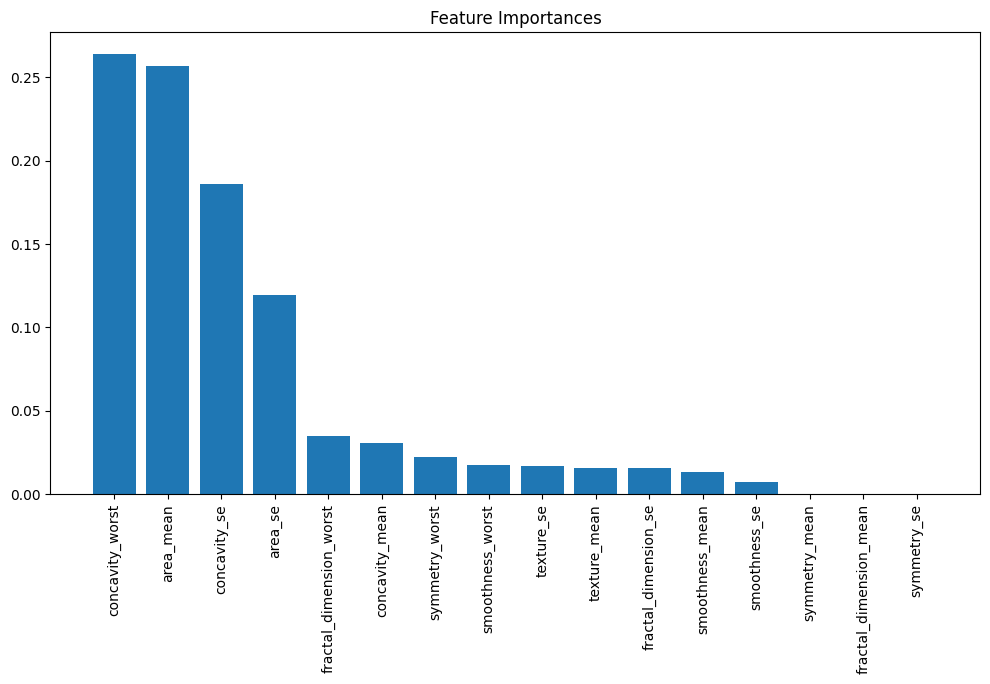

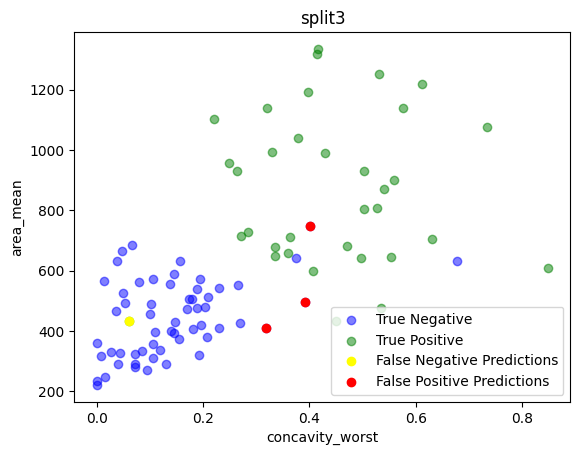

In [16]:
split_num = 3
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
param = 1
param1_split3_cm_val, param1_split3_cm_test, param1_split3_AUC_val, param1_split3_AUC_test = evaluate(param,split)

# split 4

../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split4/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
############## validate set ################
Best Threshold=1.000000
FPR: 0.0000
TPR: 0.9706
Confusion Matrix
----------------
[[57  0]
 [ 1 33]] 

----------------
split4
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%


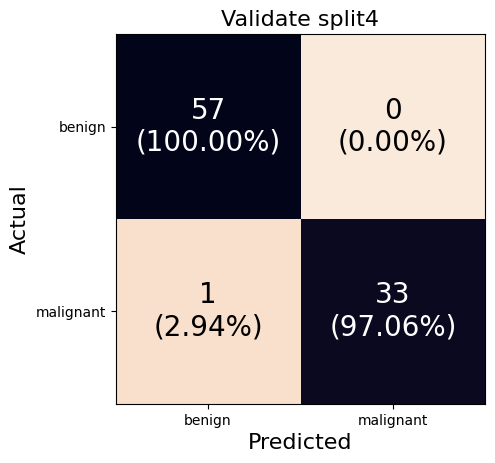

################# test set ##################
Best Threshold=1.000000
FPR: 0.0139
TPR: 0.8571
            id diagnosis  texture_mean  area_mean  smoothness_mean  \
33      904689         B         18.29      525.2          0.07351   
74      864877         M         22.91      782.6          0.11550   
76   911296201         M         27.15      930.9          0.09898   
79      867739         M         21.91     1075.0          0.09430   
82     9110127         M         16.85      990.0          0.08947   
84      916838         M         20.26     1214.0          0.10370   
113     875938         M         22.29      588.9          0.12000   

     concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
33          0.04057         0.1874                 0.05899      1.2990   
74          0.21330         0.2096                 0.07331      1.0720   
76          0.10070         0.1793                 0.06281      1.1520   
79          0.11530         0.1692               

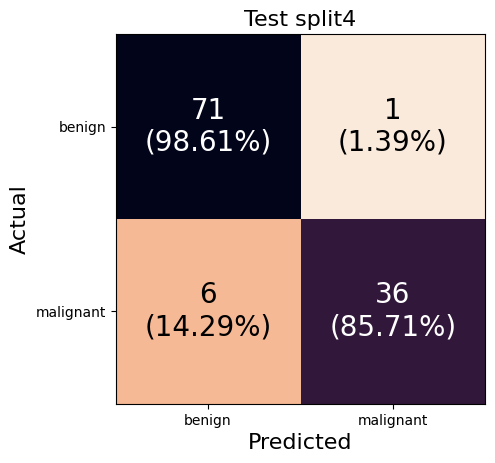

---------------------------------------
AUC validate: 98.48%
AUC test: 92.16%


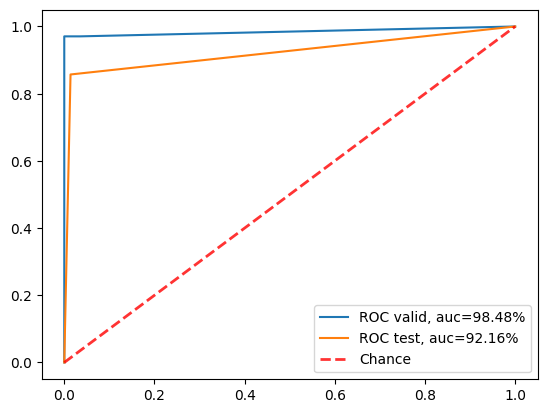

false_predict
The most important feature in split split4 is: area_mean


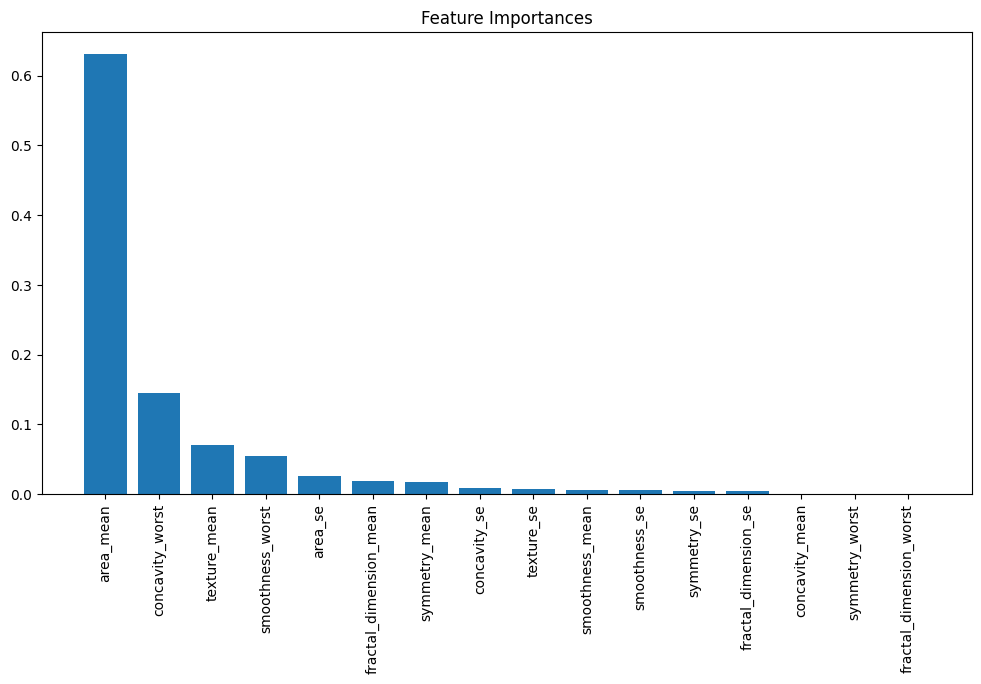

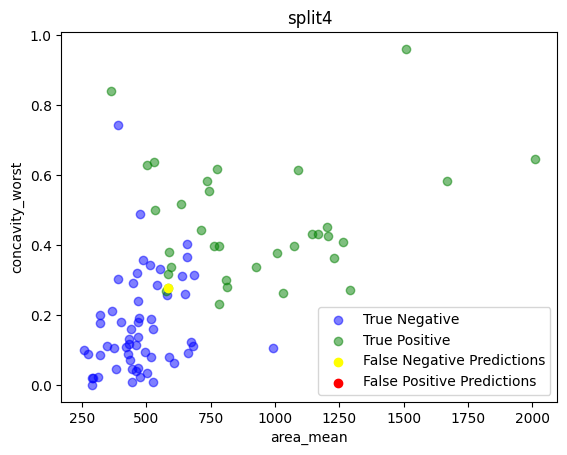

In [17]:
split_num = 4
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
param = 1
param1_split4_cm_val, param1_split4_cm_test, param1_split4_AUC_val, param1_split4_AUC_test = evaluate(param,split)

# split 5

../kitt/DATA_progress3_new//split5/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split5/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
############## validate set ################
Best Threshold=0.500000
FPR: 0.0526
TPR: 1.0000
Confusion Matrix
----------------
[[54  3]
 [ 0 34]] 

----------------
split5
Sensitivity: 100.00%
Specificity: 94.74%
Accuracy: 96.70%
Precision: 91.89%
Sensitivity: 100.00%
Precision: 91.89%
F1: 95.77%


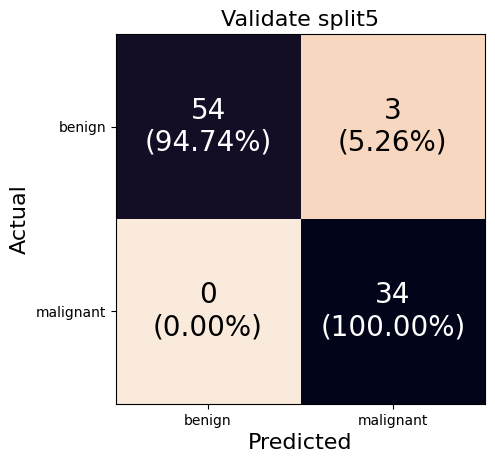

################# test set ##################
Best Threshold=0.500000
FPR: 0.0833
TPR: 0.9286
          id diagnosis  texture_mean  area_mean  smoothness_mean  \
2    8510426         B         14.36      566.3          0.09779   
29     87127         B          9.71      357.6          0.09594   
33    904689         B         18.29      525.2          0.07351   
50    861103         B         20.97      401.5          0.11020   
52     89296         B         18.16      403.1          0.08853   
66    883852         B         18.19      389.4          0.09592   
79    867739         M         21.91     1075.0          0.09430   
94     85715         M         18.66      534.6          0.11580   
110   908445         M         21.97     1110.0          0.10180   

     concavity_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
2           0.06664         0.1885                 0.05766      0.7886   
29          0.02531         0.1381                 0.06400      0.4064   
33 

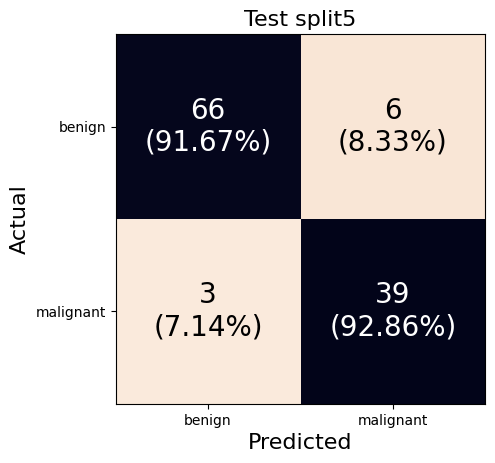

---------------------------------------
AUC validate: 97.78%
AUC test: 93.25%


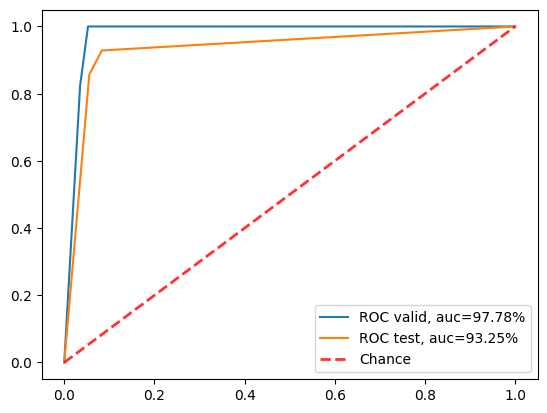

false_predict
The most important feature in split split5 is: area_mean


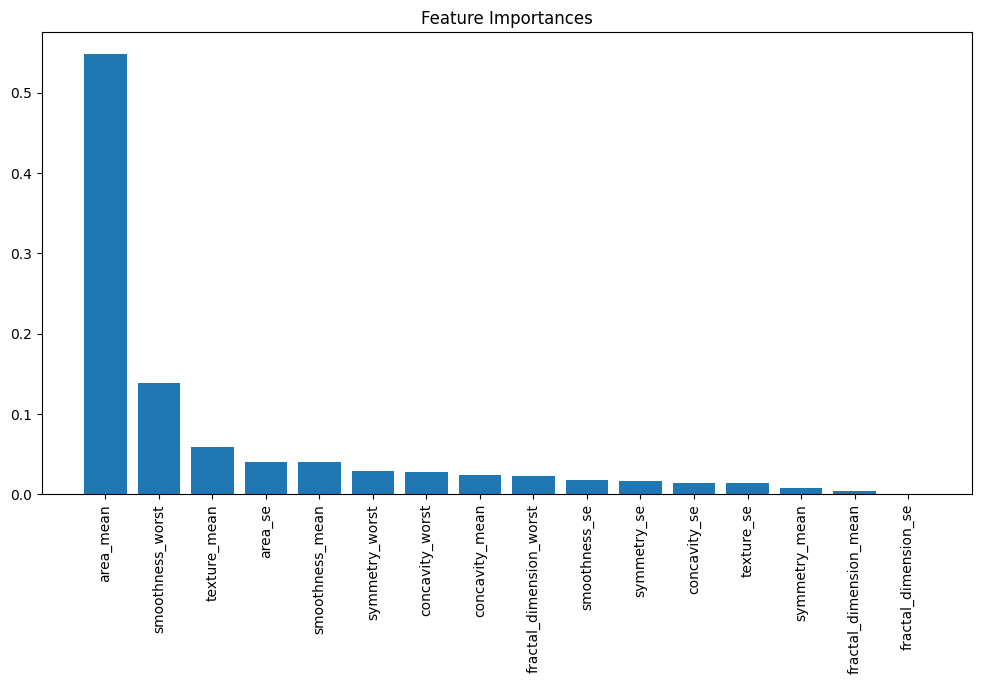

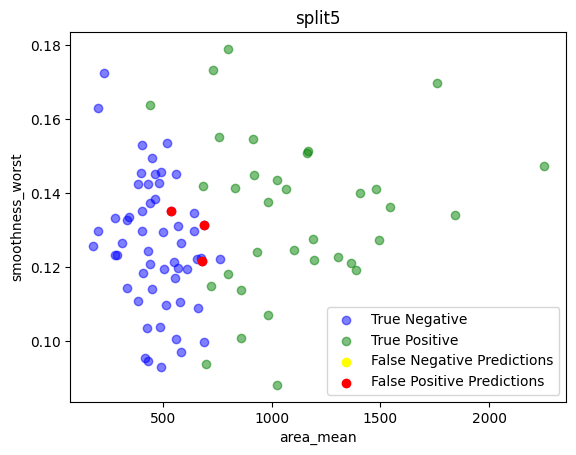

In [18]:
split_num = 5
split = "split{}".format(split_num)
x_train,y_train,x_test,y_test,x_val,y_val = setup(split)
param = 1
param1_split5_cm_val, param1_split5_cm_test, param1_split5_AUC_val, param1_split5_AUC_test = evaluate(param,split)

# Overall

param1
split1
Sensitivity: 94.12%
Specificity: 96.49%
Accuracy: 95.60%
Precision: 94.12%
Sensitivity: 94.12%
Precision: 94.12%
F1: 94.12%

split2
Sensitivity: 100.00%
Specificity: 96.49%
Accuracy: 97.80%
Precision: 94.44%
Sensitivity: 100.00%
Precision: 94.44%
F1: 97.14%

split3
Sensitivity: 97.06%
Specificity: 94.74%
Accuracy: 95.60%
Precision: 91.67%
Sensitivity: 97.06%
Precision: 91.67%
F1: 94.29%

split4
Sensitivity: 97.06%
Specificity: 100.00%
Accuracy: 98.90%
Precision: 100.00%
Sensitivity: 97.06%
Precision: 100.00%
F1: 98.51%

split5
Sensitivity: 100.00%
Specificity: 94.74%
Accuracy: 96.70%
Precision: 91.89%
Sensitivity: 100.00%
Precision: 91.89%
F1: 95.77%

overall
sensitivity: 97.65 ± 2.46%
specificity: 96.49 ± 2.15%
accuracy: 96.92 ± 1.43%
precision: 94.42 ± 3.36%
f1_score: 95.97 ± 1.88%


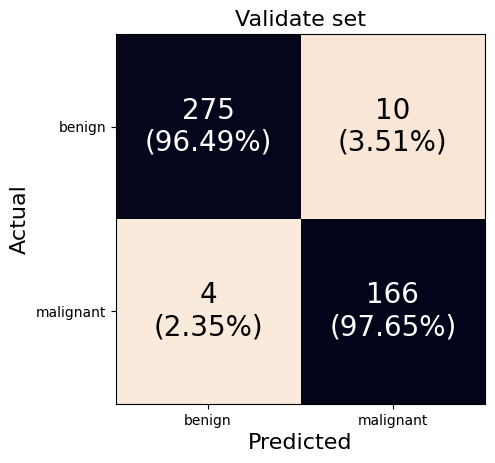

AUC2: 9714.14 ± 144.36%
../kitt/DATA_progress3_new//split1/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split1/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0351
TPR: 0.9412
../kitt/DATA_progress3_new//split2/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split2/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0351
TPR: 1.0000
../kitt/DATA_progress3_new//split3/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//test.csv
(114, 18)
(114, 16)
['B' 'M']
../kitt/DATA_progress3_new//split3/val/val.csv
(91, 18)
(91, 16)
['B' 'M']
Best Threshold=1.000000
FPR: 0.0526
TPR: 0.9706
../kitt/DATA_progress3_new//split4/train/train_oversampling.csv
(456, 18)
(456, 16)
['B' 'M']
../kitt/DATA_progress3_new//te

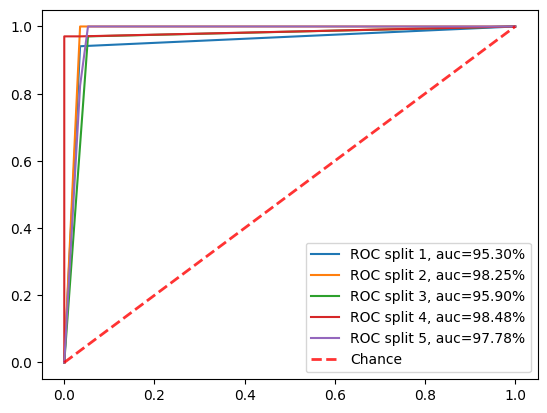

In [9]:
print("param1")
plot(param1_split1_cm_val , param1_split2_cm_val , param1_split3_cm_val , param1_split4_cm_val , param1_split5_cm_val)
Mean_SD("AUC2",param1_split1_AUC_val*100, param1_split2_AUC_val*100, param1_split3_AUC_val*100, param1_split4_AUC_val*100, param1_split5_AUC_val*100)
ROC_split(1)